# EDA-2 Detección y Tratamiento de Outliers

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


Para continuar con el EDA de nuestros archivos, debemos notar que de los 15 archivos que actualmente tenemos podemos agruparlos segun el nivel geopolitico al que hacen referencia.
Tenemos estos 15 archivos:

In [2]:
def archivos_carpeta(carpeta):
    archivos = [archivo for archivo in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, archivo))]
    for archivo in archivos:
        print(archivo)

In [3]:
import os
import pandas as pd

archivos_en_carpeta = [archivo for archivo in os.listdir('dataset_limpio/') if os.path.isfile(os.path.join('dataset_limpio/', archivo))]

print("Archivos en la carpeta:")
for archivo in archivos_en_carpeta:
    df = pd.read_csv(f'dataset_limpio/{archivo}')
    
    print(archivo, list(df.columns))

Archivos en la carpeta:
Acceso a Internet fijo banda ancha y banda angosta nacional.csv ['Año', 'Trimestre', 'Banda ancha fija', 'Dial up', 'Total']
Acceso a Internet fijo banda ancha y banda angosta por provincia.csv ['Año', 'Trimestre', 'Provincia', 'Banda ancha fija', 'Dial up', 'Total']
Acceso a Internet fijo por tecnología nacional.csv ['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
Acceso a Internet fijo por tecnología y por provincia.csv ['Año', 'Trimestre', 'Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
Accesos a Internet fijo por rangos de velocidad bajada nacional.csv ['Año', 'Trimestre', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps', 'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS', 'Total']
Accesos a Internet fijo por rangos de velocidad bajada por provincia.csv ['Año', 'Trimestre', 'Provincia', 'HASTA 512 kbps', '+ 512 K

Los cuales podemos agrupar como:
|                                                                   Archivo|Nivel Nacional|Nivel Provincial|Nivel Local|
|--------------------------------------------------------------------------|--------------|----------------|-----------|
|Acceso a Internet fijo banda ancha y banda angosta                        |Si            |Si              |--         |
|Acceso a Internet fijo por tecnología                                     |Si            |Si              |Si         |
|Accesos a Internet fijo por rangos de velocidad bajada                    |Si            |Si              |--         |
|Accesos a Internet fijo por velocidad bajada                              |--            |Si              |Si         |
|Conectividad al servicio de Internet por tecnologia                       |--            |--              |Si         |
|Ingresos por el servicio de Internet fijo                                 |Si            |--              |--         |
|Penetración del servicio de Internet fijo                                 |Si            |Si              |--         |
|Velocidad Media de bajada de Internet                                     |Si            |Si              |--         |

Para empezar los archivos con "Acceso a internet fijo por velocidad bajada" reflejan lo mismo que "Accesos a internet fijo por rangos de velocidad bajada" ademas de que si bien es util la informacion que proporcionan, estan limitados por la tecnologia a la cual se adhieren, y en el dataset justamente disponemos de un archivo que nos resume esto. Es por ello que descartaremos esto archivos y no es centraremos en los archivos por acceso internet fijo por tecnologia. Por los mismos motivos descartaremos los archivos de "Acceso a internet fijo por banda ancha y banda angos banda ancha y banda angosta", reflejan la misma informacion pero con mas detalle

Para la busqueda de outliers tendremos las siguientes 2 funciones:

La siguiente funcion hara un analisis unidimensional de las variables en la busqueda de outliers, se usaran graficas como box-plot, violin y Q-Q

In [4]:
def analisis_univariable(df, column_name):
    # Crea una figura con tres subgráficos uno al lado del otro
    fig, axes = plt.subplots(1, 3, figsize=(16, 8), sharey=True)

    # Box plot en el primer subgráfico (izquierda)
    box_plot = axes[0].boxplot(df[column_name], vert=True, patch_artist=True)
    axes[0].set_title(f'Box Plot: {column_name}')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico de violín en el segundo subgráfico (centro)
    violin_plot = axes[1].violinplot([df[column_name]], vert=True, showextrema=True)
    axes[1].set_title(f'Violin Plot: {column_name}')
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)

    # Gráfico Q-Q en el tercer subgráfico (derecha)
    res = stats.probplot(df[column_name], plot=axes[2])
    axes[2].set_title(f'Q-Q Plot: {column_name}')
    axes[2].grid(axis='both', linestyle='--', alpha=0.7)

    # Personaliza el aspecto del gráfico de violín
    for pc in violin_plot['bodies']:
        pc.set_facecolor('lightblue')
        pc.set_edgecolor('black')
        pc.set_linewidth(1)

    # Agrega etiquetas a los ejes x
    axes[0].set_xlabel(column_name)
    axes[1].set_xlabel(column_name)

    plt.suptitle(f'Analisis de la columna \"{column_name}\"', fontsize=16)

    # Ajusta el espaciado entre los subgráficos
    plt.tight_layout()

    # Muestra la figura
    plt.show()

La siguiente función hace un analisis bivariable de una columna a lo largo del tiempo

In [5]:
def analisis_dispersion(df, año_column, trimestre_column, column_name):
    año = df[año_column]
    trimestre = df[trimestre_column]
    column = df[column_name]

    # Crea el gráfico de dispersión
    plt.figure(figsize=(8, 4))
    plt.scatter(column, año + (trimestre - 1) * 0.25, marker='o', s=20, color='red')

    # Establece las marcas de los ejes Y solo para los valores únicos en el eje de Año
    unique_años = df[año_column].unique()
    plt.yticks(unique_años, unique_años)

    # Etiqueta los ejes y el gráfico
    plt.xlabel(column_name)
    plt.ylabel(f'{año_column} / {trimestre_column}')
    plt.title(f'Gráfico de Dispersión para {column_name} del tiempo')

    # Muestra el gráfico
    plt.grid(axis='y', linestyle='--', alpha=0.6)  # Agrega líneas de rejilla en el eje Y
    plt.show()

# Analisis de archivos con nivel nacional

En esta sección analizaremos los archivos referentes al nivel nacional que son:

In [5]:
nacional= archivos_carpeta('dataset_nacional/')

Acceso a Internet fijo por tecnología nacional.csv
Ingresos por el servicio de Internet fijo nacional.csv
Penetración del servicio de Internet fijo nacional.csv
Velocidad Media de bajada de Internet nacional.csv


## - Busqueda de outliers

### 1. Analisis del archivo 'Acceso a Internet fijo por tecnología nacional.csv'

In [6]:
df_01 = pd.read_csv('dataset_nacional/Acceso a Internet fijo por tecnología nacional.csv')
list(df_01.columns)

['Año',
 'Trimestre',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros',
 'Total']

In [7]:
columnas_de_interes = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']

#### Analisis univariable

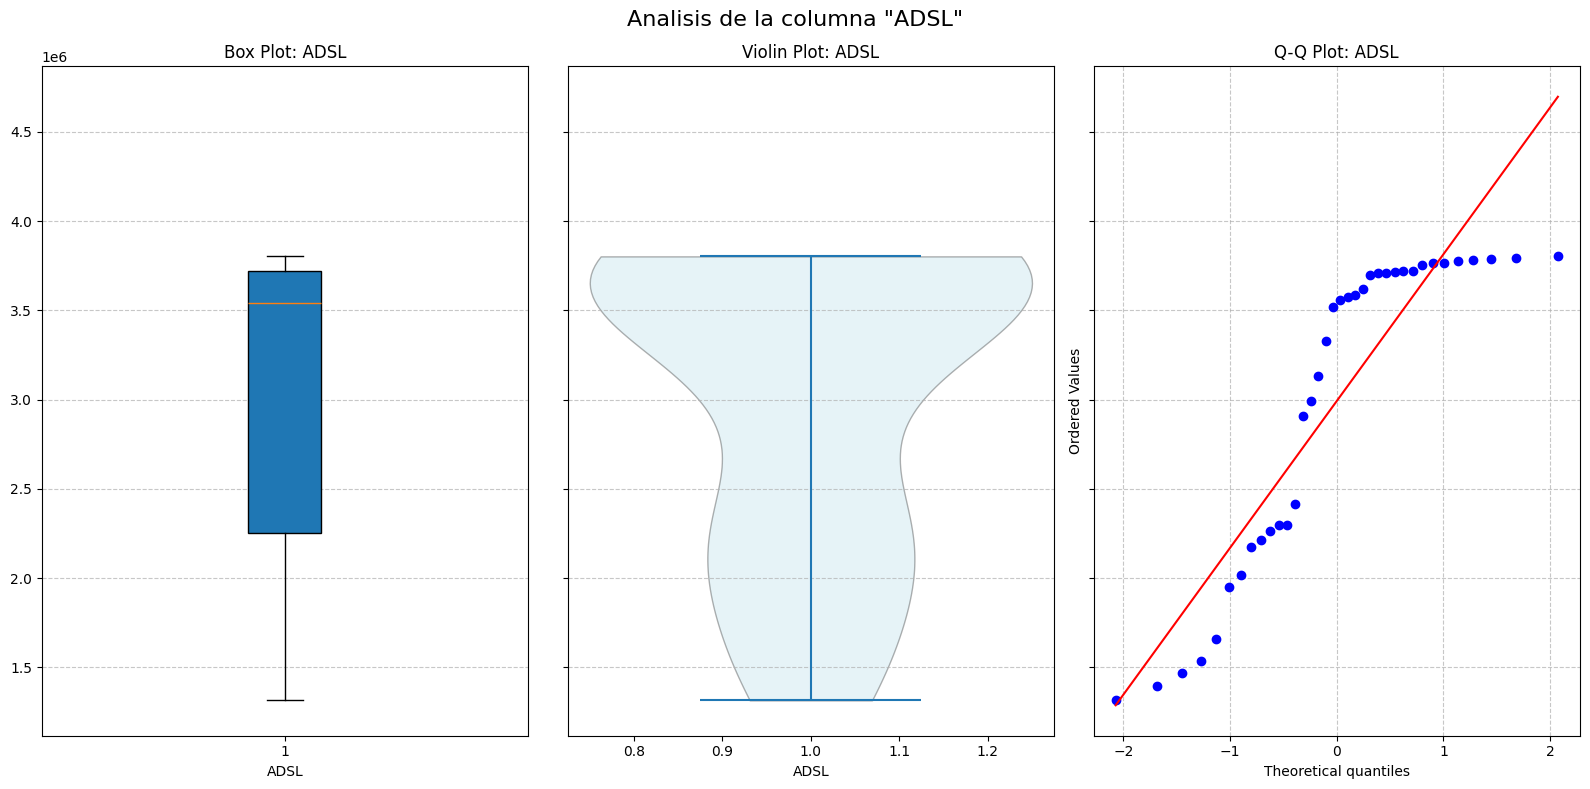

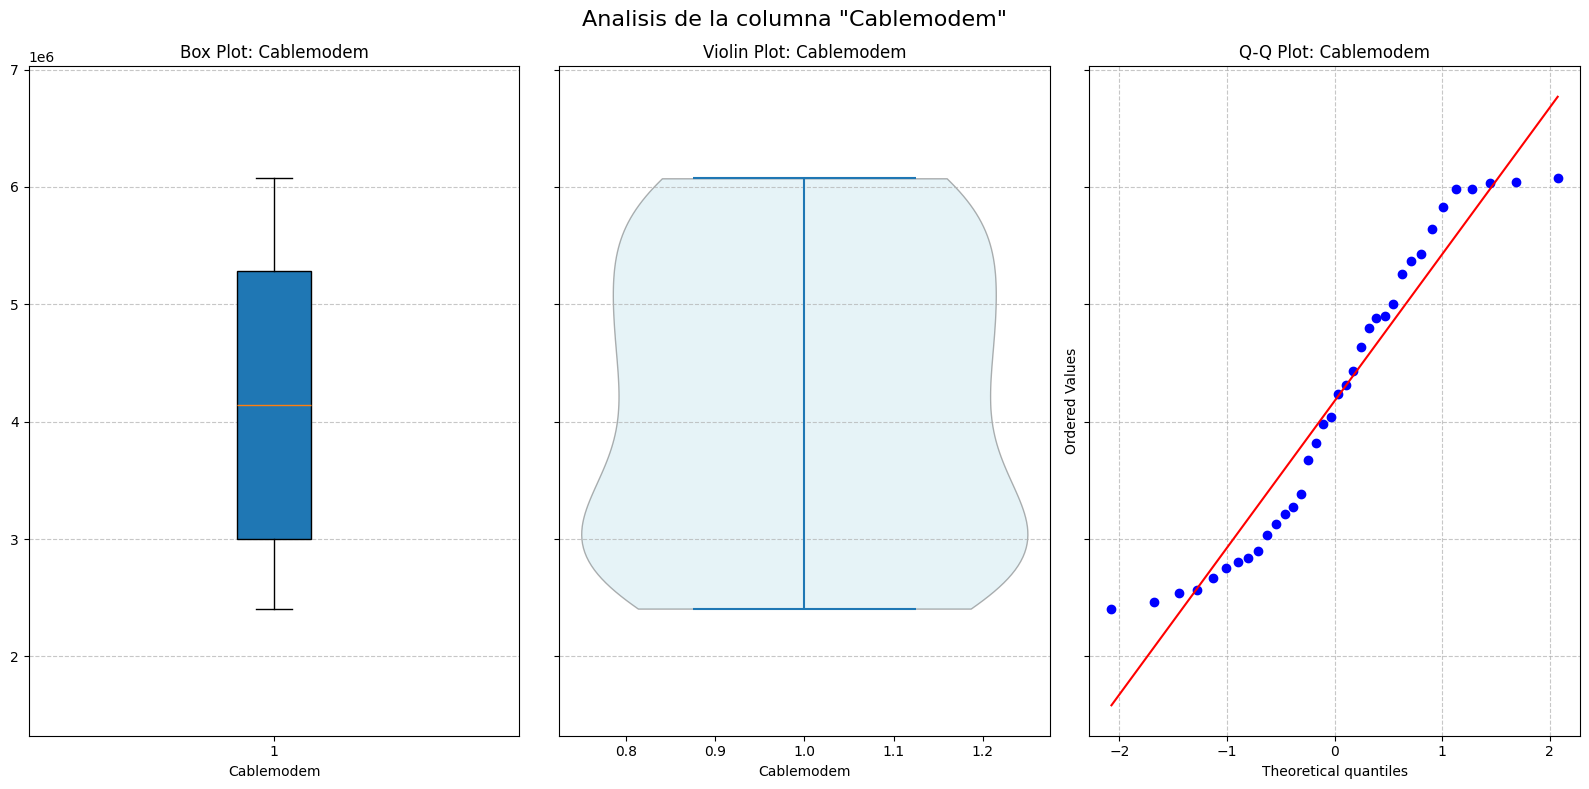

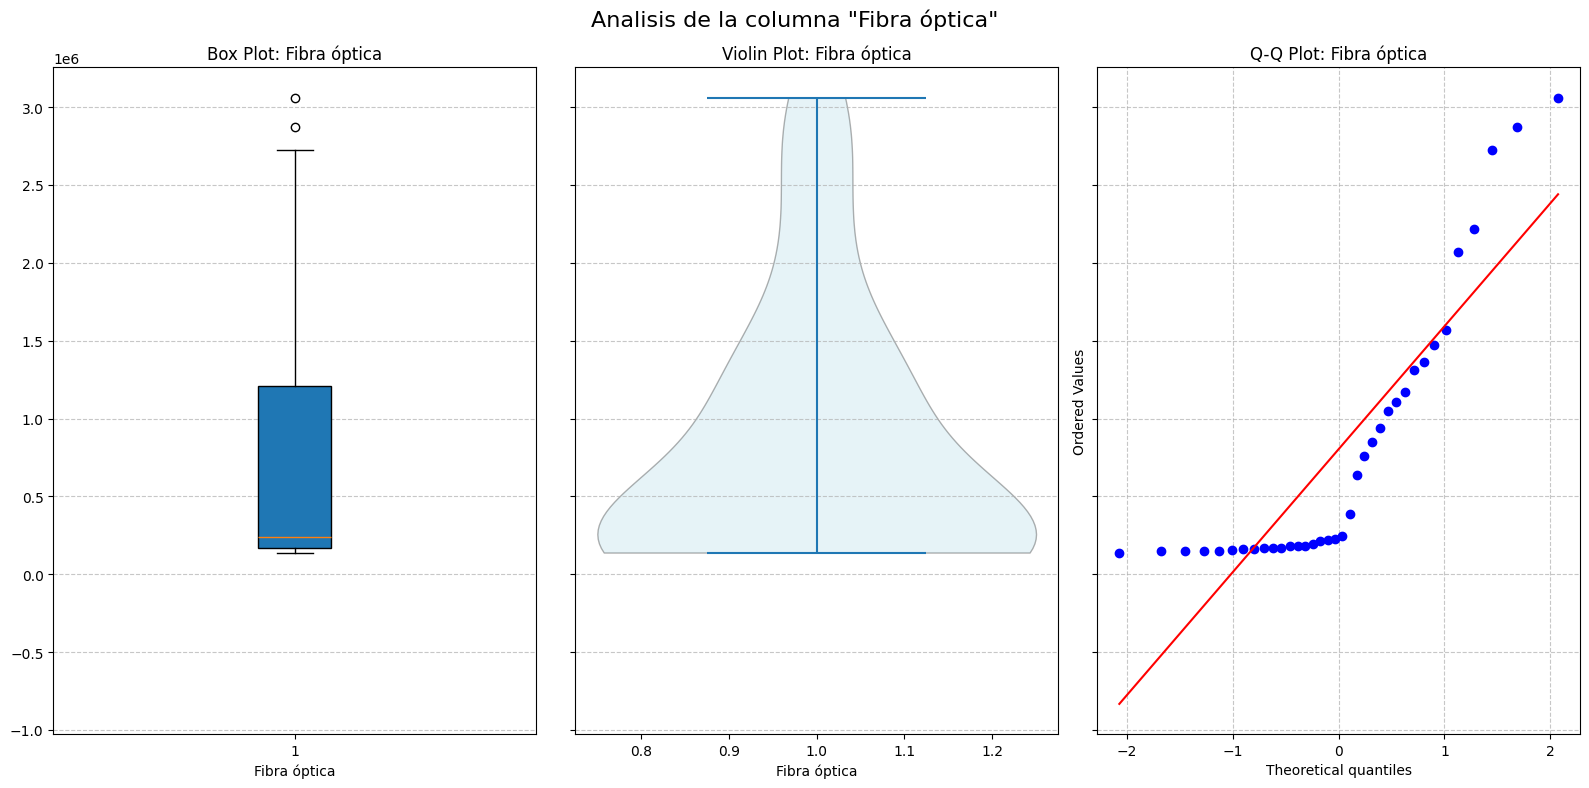

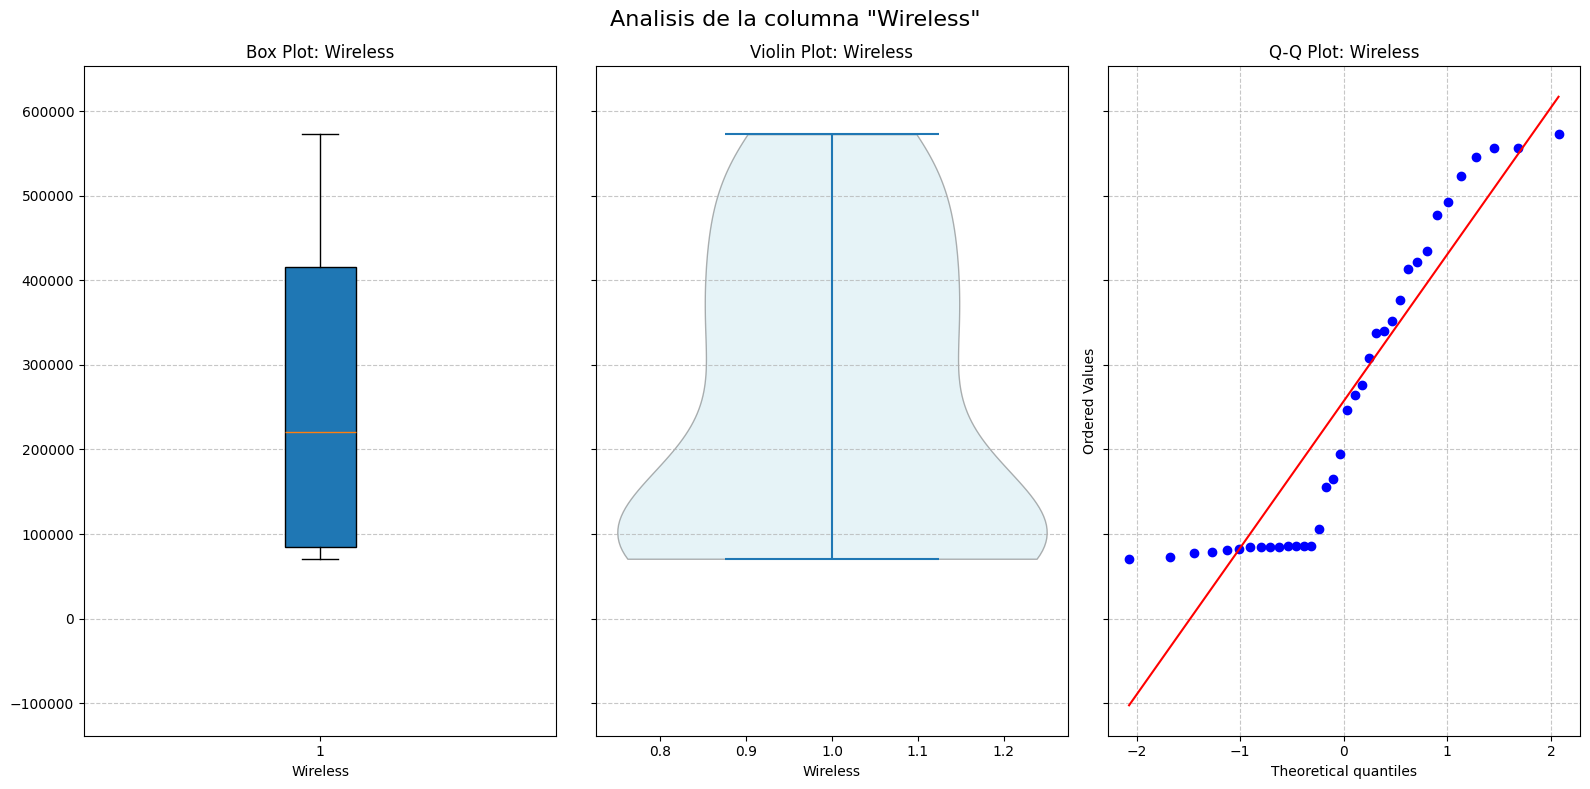

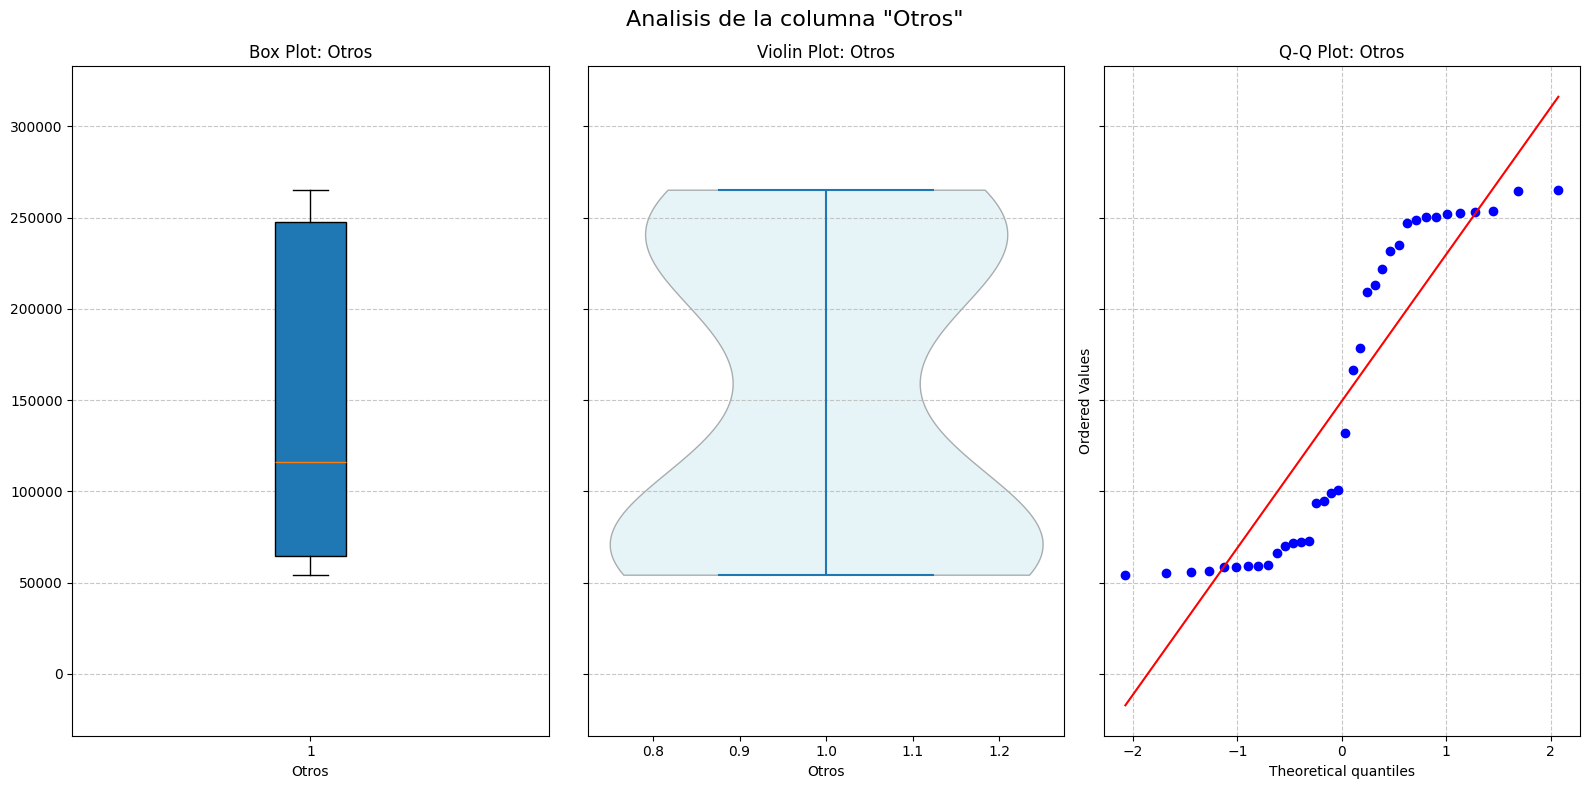

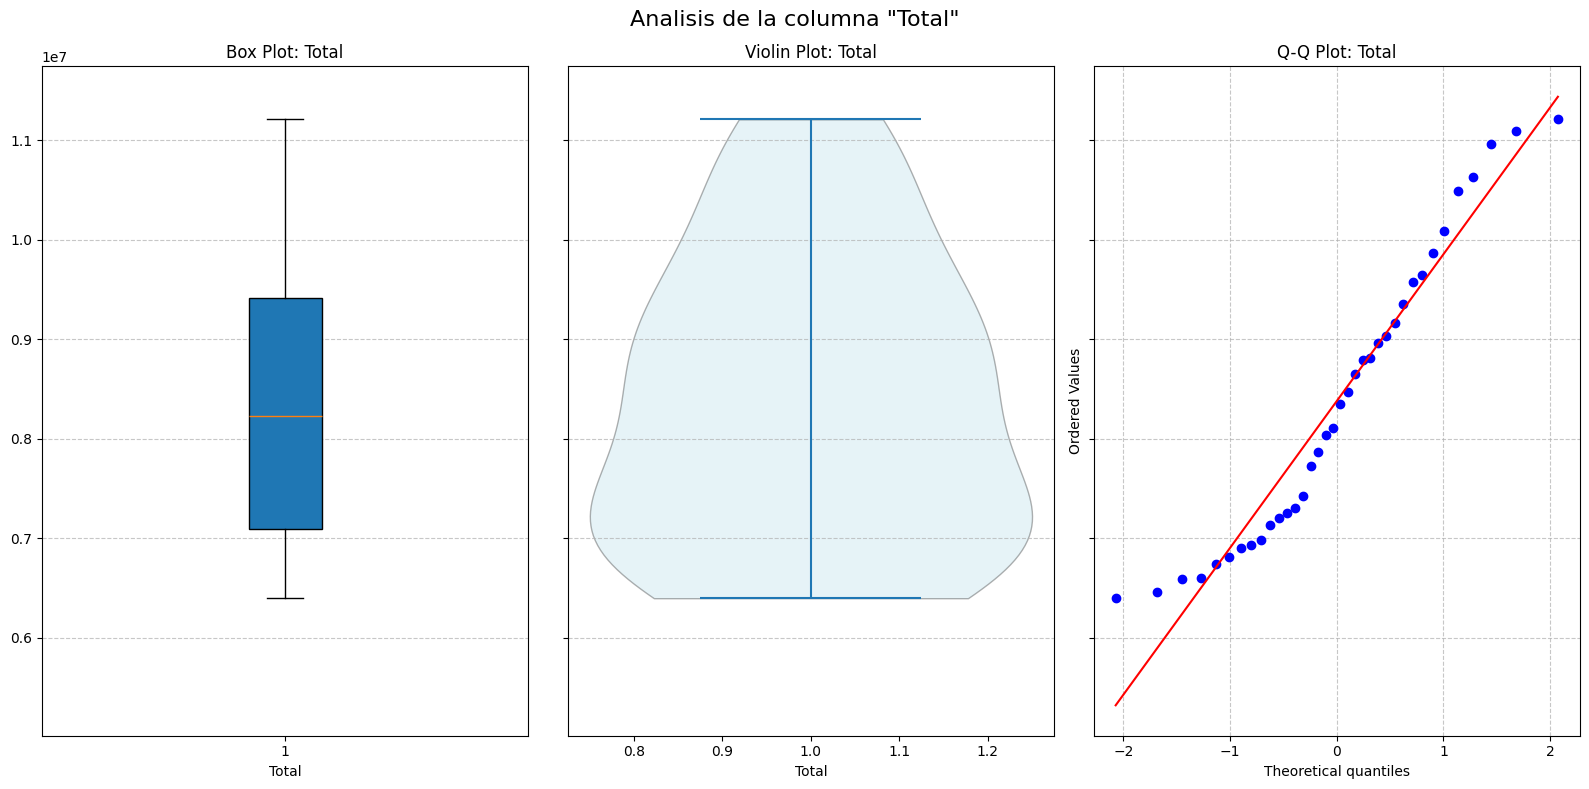

In [14]:
for columna in columnas_de_interes:
    univariable = analisis_univariable(df_01, columna)

Observaciones: es de notar que en el analisis boxplot para fibra optica probablemente existan outliers

#### Analisis bivariable

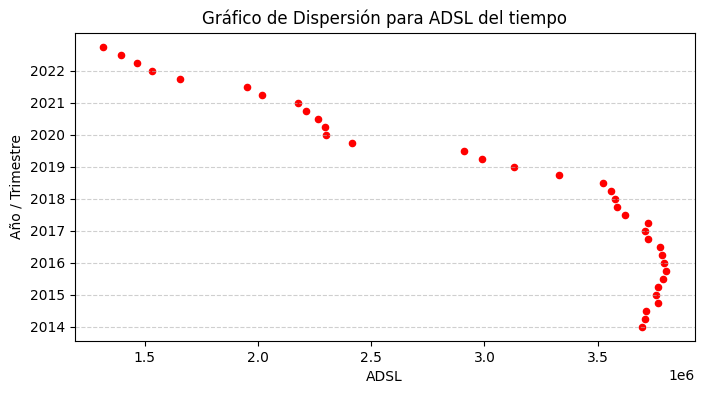

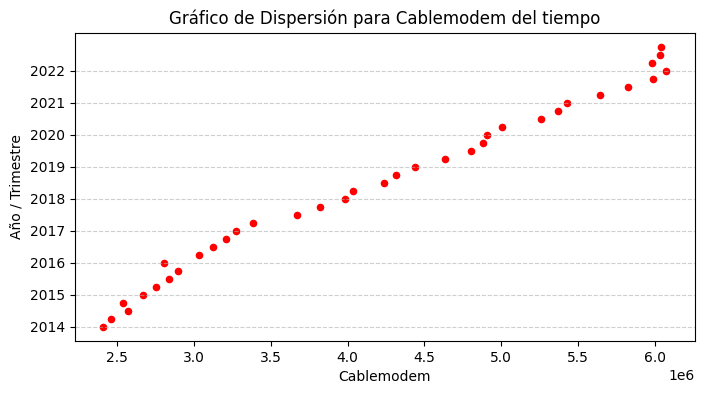

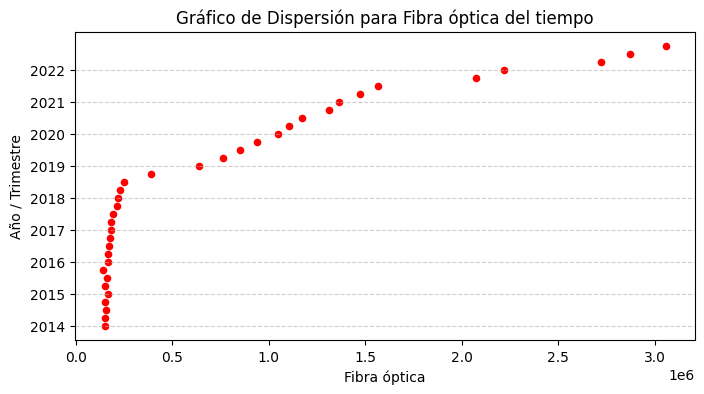

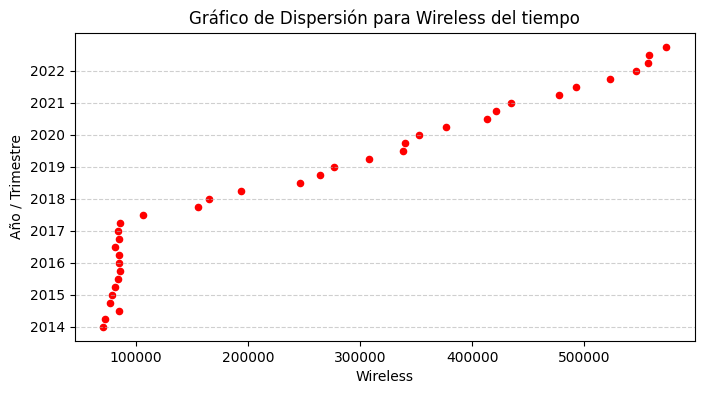

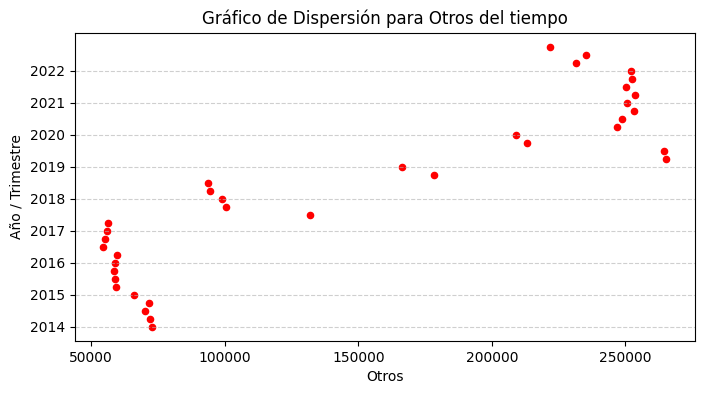

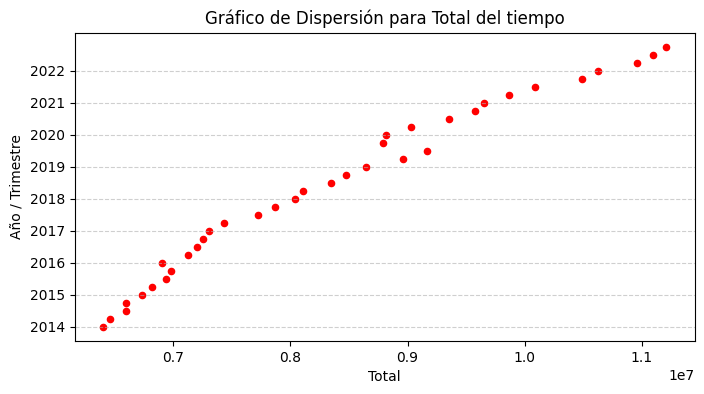

In [15]:
for columna in columnas_de_interes:
    analisis_dispersion(df_01, 'Año', 'Trimestre', columna)

Observaciones: Podemos ver que para el caso de la fibra optica hubo un fuerte incremento en el numero de accesos por ello podemos considerar que no existen outliers

### 2. Analisis del archivo 'Ingresos por el servicio de Internet fijo nacional.csv'

In [8]:
df_02 = pd.read_csv('dataset_nacional/Ingresos por el servicio de Internet fijo nacional.csv')
list(df_02.columns)

['Año', 'Trimestre', 'Ingresos (miles de pesos)']

#### Analisis univariable

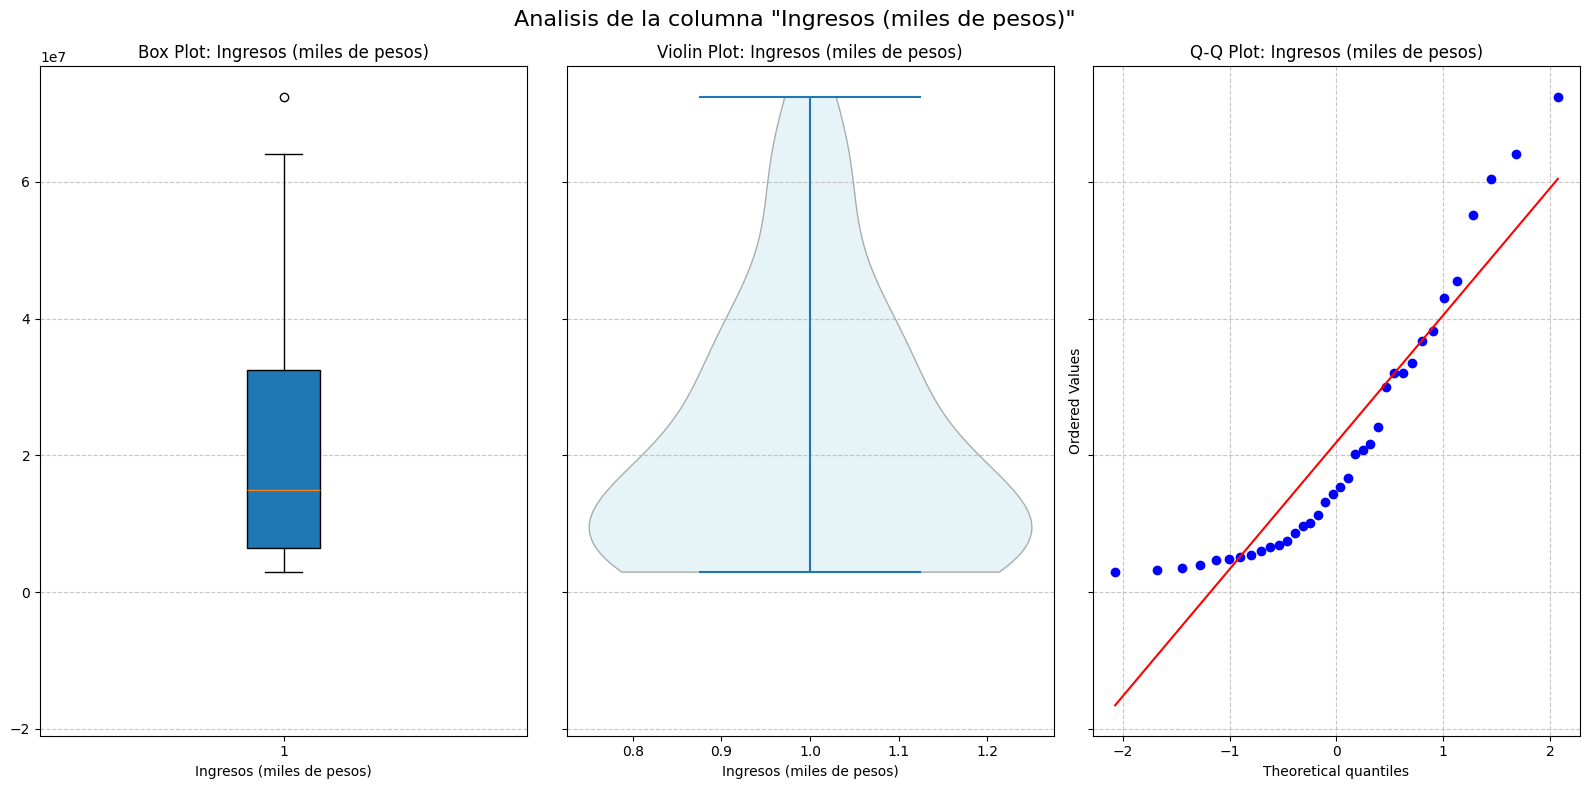

In [22]:
univariable = analisis_univariable(df_02, 'Ingresos (miles de pesos)')

#### Analisis bivariable

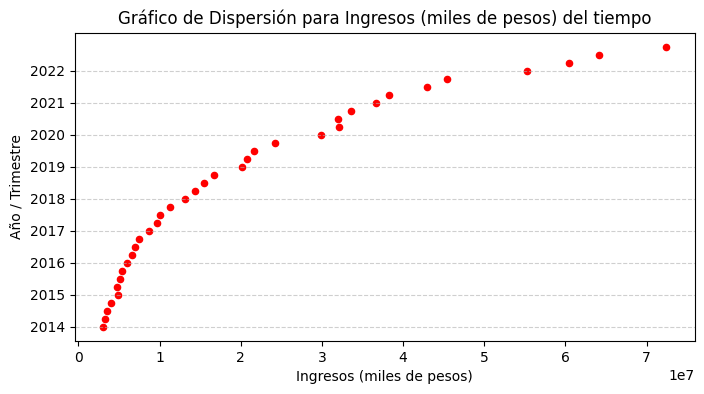

In [23]:
analisis_dispersion(df_02, 'Año', 'Trimestre', 'Ingresos (miles de pesos)')

### 3. Penetración del servicio de Internet fijo nacional.csv

In [9]:
df_03 = pd.read_csv('dataset_nacional/Penetración del servicio de Internet fijo nacional.csv')
list(df_03.columns)

['Año',
 'Trimestre',
 'Accesos por cada 100 hogares',
 'Accesos por cada 100 hab']

In [26]:
columnas_de_interes = ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']

#### Analisis univariable

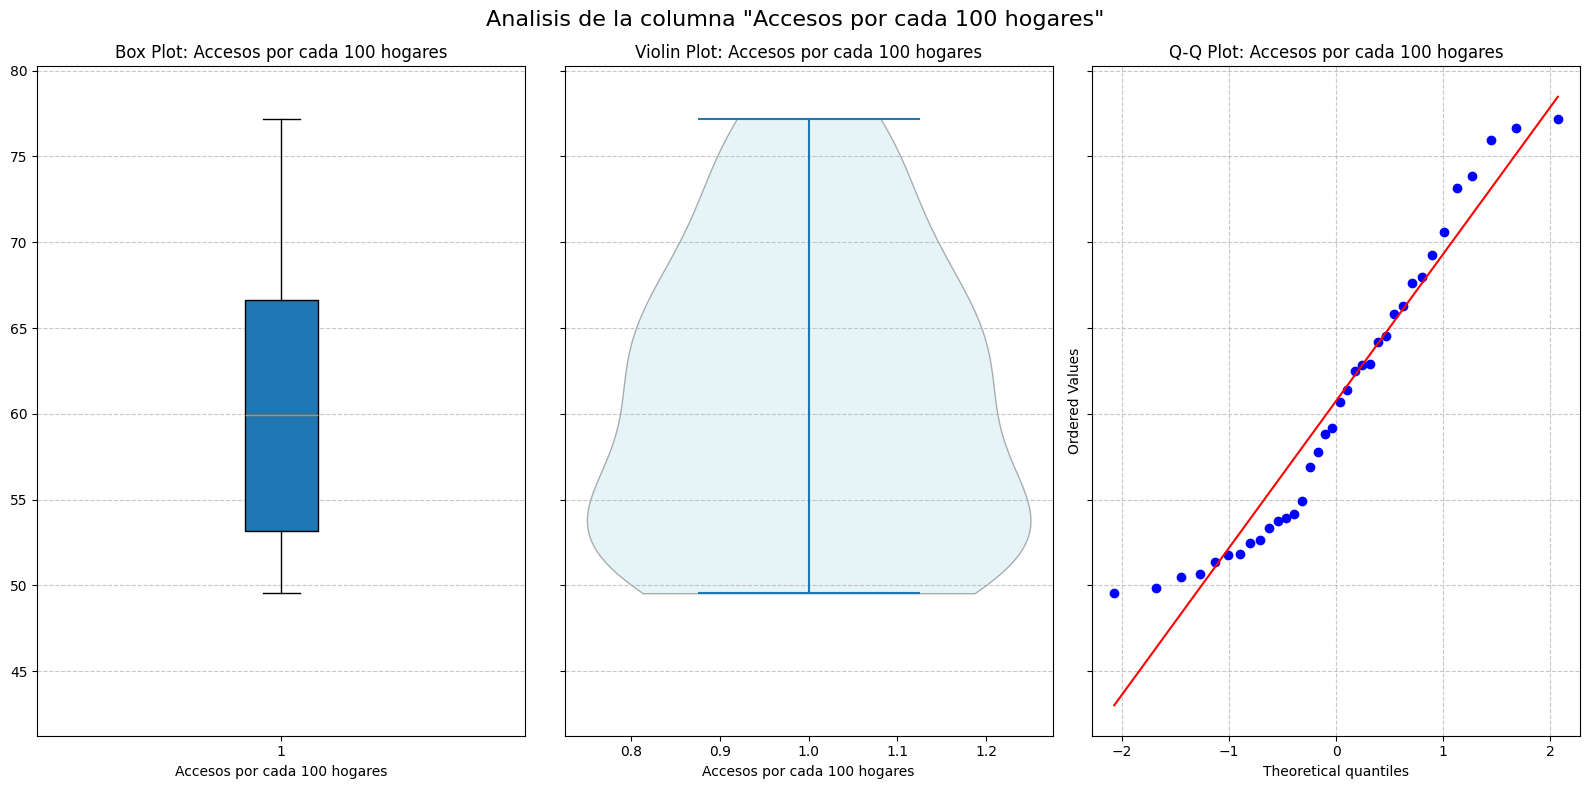

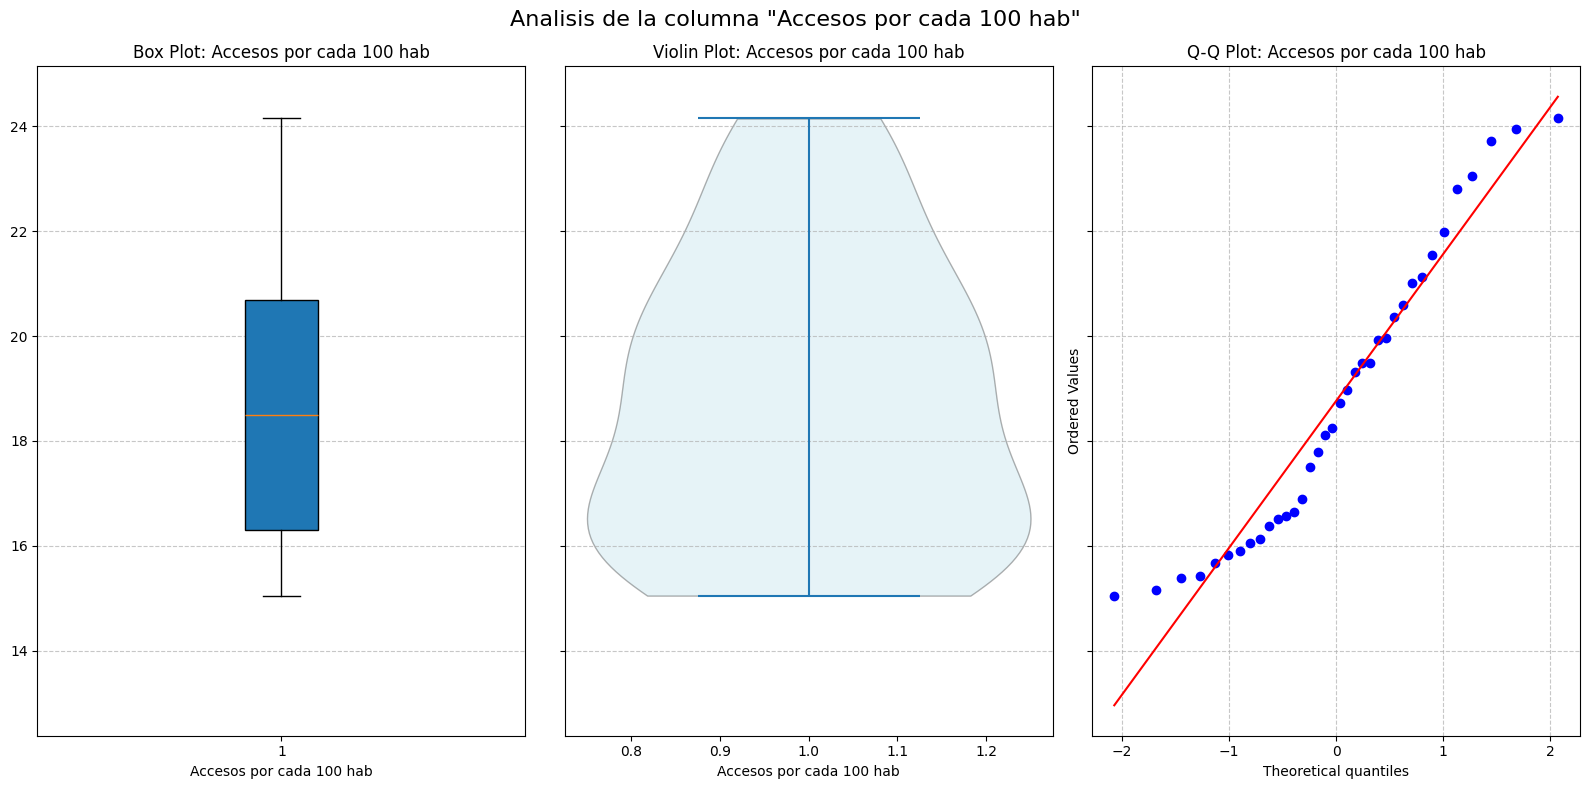

In [27]:
for columna in columnas_de_interes:
    univariable = analisis_univariable(df_03, columna)

#### Analisis bivariable

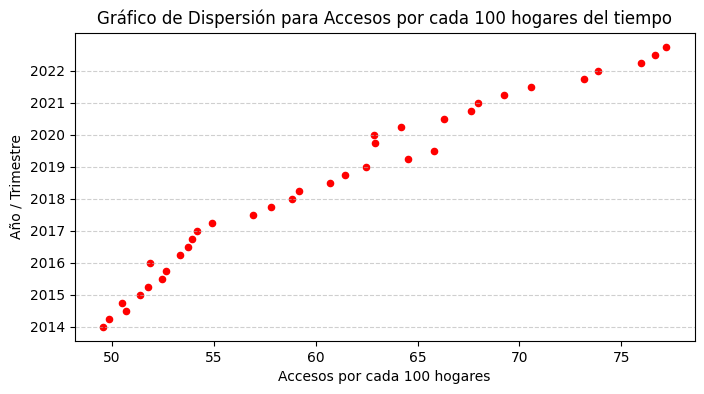

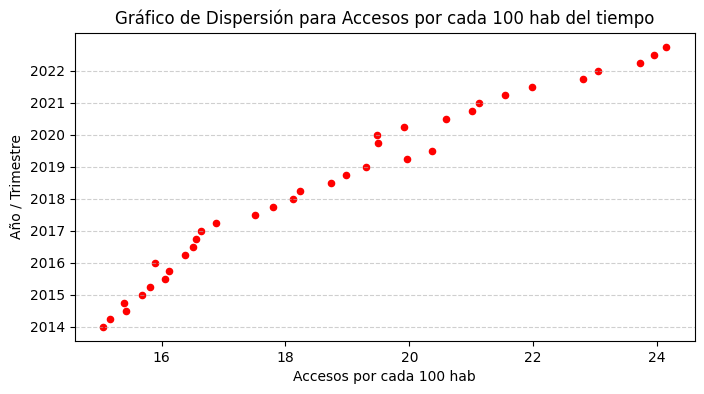

In [28]:
for columna in columnas_de_interes:
    analisis_dispersion(df_03, 'Año', 'Trimestre', columna)

### 4. Analisis del archivo 'Velocidad Media de bajada de Internet nacional.csv'

In [10]:
df_04 = pd.read_csv('dataset_nacional/Velocidad Media de bajada de Internet nacional.csv')
list(df_04.columns)

['Año', 'Trimestre', 'Mbps (Media de bajada)']

#### Analisis univariable

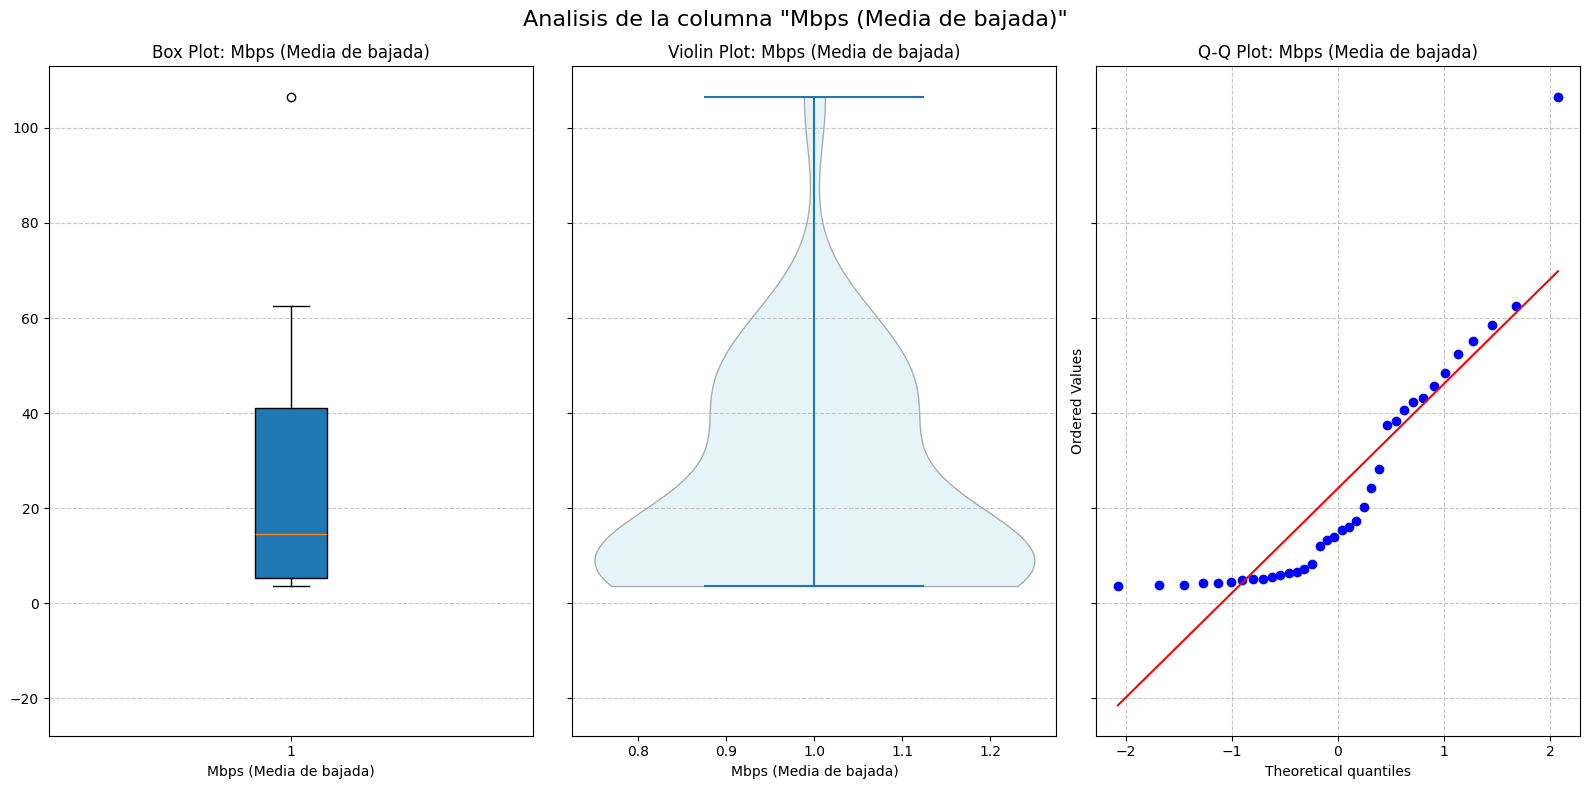

In [31]:
univariable = analisis_univariable(df_04, 'Mbps (Media de bajada)')

#### Analisis bivariable

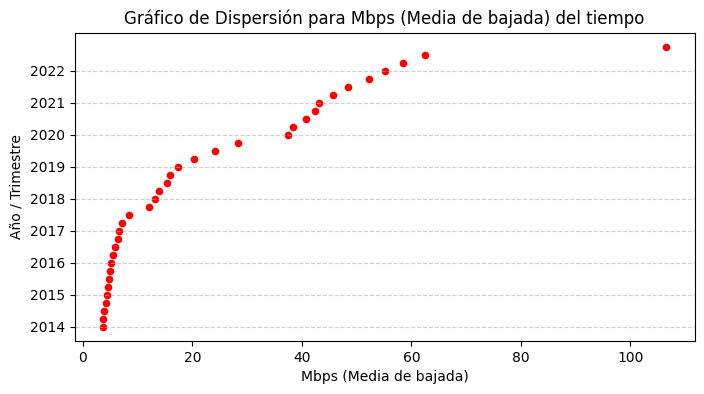

In [29]:
analisis_dispersion(df_04, 'Año', 'Trimestre', 'Mbps (Media de bajada)')

Observaciones: Podemos observar un incremento abismal de la velocidad de internet para el ultimo periodo del 2022 el cual podria tomarse como un outlier, no obstante este puede justificarse por acciones de las propias empresas proveedoras de internet como Telecom Argentina las cuales duplicaron la velocidad de su servicio

## - Salida final de los archivos

Es importante notar que estos 4 archivos pueden juntarse en uno solo para facilitar el analisis, es por ello que los juntaremos.

In [21]:
# Unión de df_01 y df_04
merged_df = df_01.merge(df_04, on=['Año', 'Trimestre'], how='inner')

# Unión de merged_df y df_02
merged_df = merged_df.merge(df_02, on=['Año', 'Trimestre'], how='inner')

# Unión de merged_df y df_03
merged_df = merged_df.merge(df_03, on=['Año', 'Trimestre'], how='inner')

merged_df

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada),Ingresos (miles de pesos),Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,106.560000,7.244348e+07,77.210000,24.150000
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,62.460000,6.408678e+07,76.640000,23.950000
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,58.440000,6.041950e+07,75.965424,23.720442
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,55.110000,5.521931e+07,73.878803,23.049171
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,52.340000,4.546789e+07,73.176397,22.810702
5,2021,3,1950631,5826257,1566048,492415,250190,10085541,48.460000,4.299994e+07,70.578853,21.982550
6,2021,2,2018587,5641731,1472246,476968,253552,9863084,45.630000,3.823967e+07,69.240183,21.547939
7,2021,1,2175211,5424782,1362976,434548,250455,9647972,43.110000,3.667637e+07,67.945876,21.127832
8,2020,4,2213949,5371824,1311199,421554,253036,9571562,42.360000,3.353970e+07,67.622339,21.010192
9,2020,3,2263889,5259351,1170879,413259,248821,9356199,40.670000,3.199744e+07,66.310000,20.590000


In [22]:
# Guardar el DataFrame en un archivo CSV sin el índice
merged_df.to_csv('dataset_final/archivo_final_nacional.csv', index=False)


Con esto ya tenemos información relevante a nivel de nacional sobre el internet fijo en general de Argentina

# Analisis de archivos con nivel provincial

In [23]:
nacional= archivos_carpeta('dataset_provincial/')

Acceso a Internet fijo por tecnología y por provincia.csv
Penetración del servicio de Internet fijo por provincia.csv
Velocidad Media de bajada de Internet por provincia.csv


## - Busqueda de outliers

### 1. Analisis del archivo 'Acceso a Internet fijo por tecnología y por provincia.csv'

In [3]:
df_05 = pd.read_csv('dataset_provincial/Acceso a Internet fijo por tecnología y por provincia.csv')
list(df_05.columns)

['Año',
 'Trimestre',
 'Provincia',
 'ADSL',
 'Cablemodem',
 'Fibra óptica',
 'Wireless',
 'Otros',
 'Total']

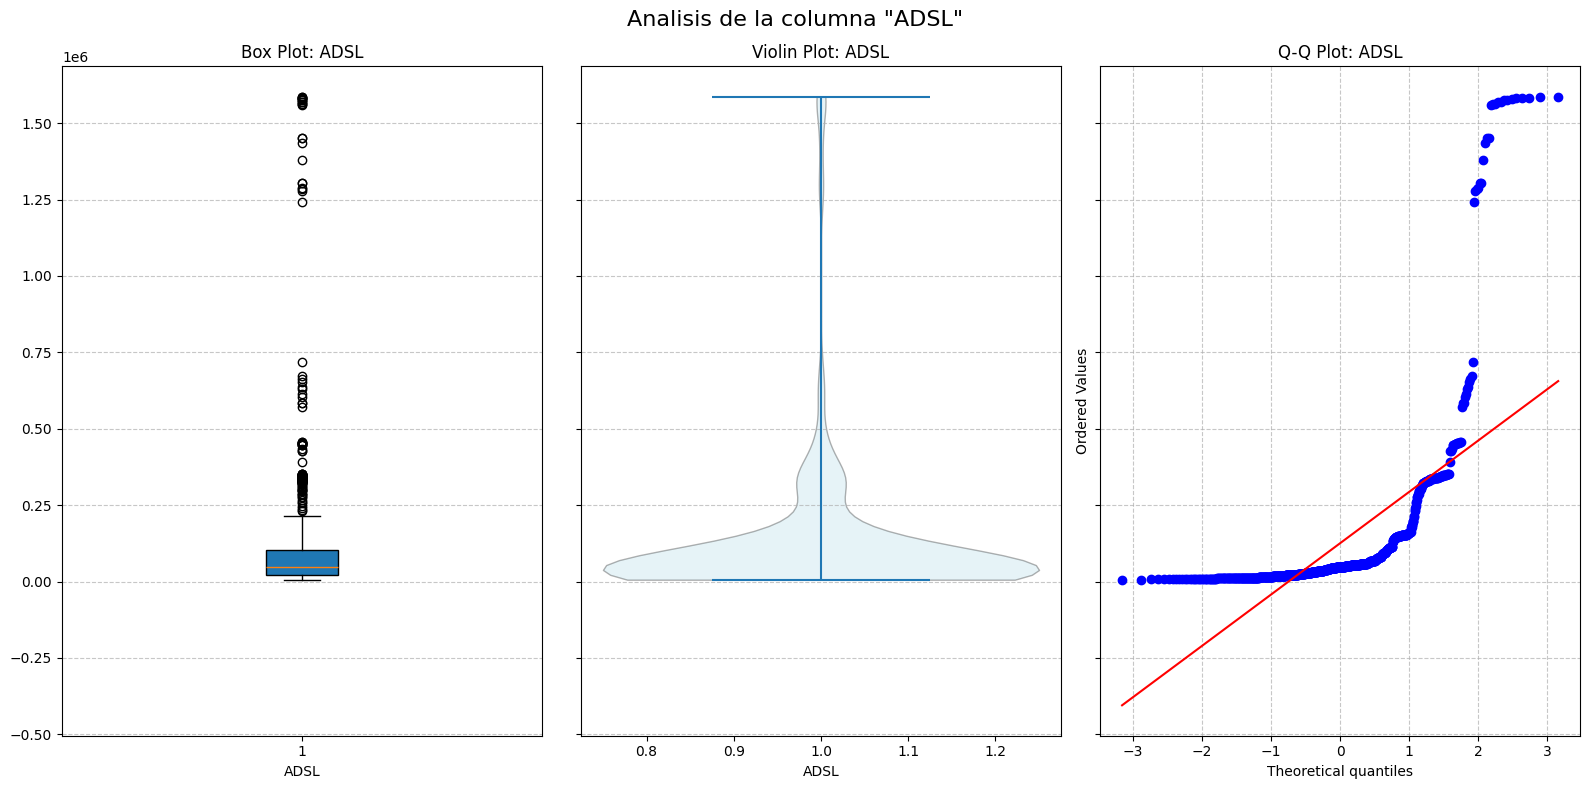

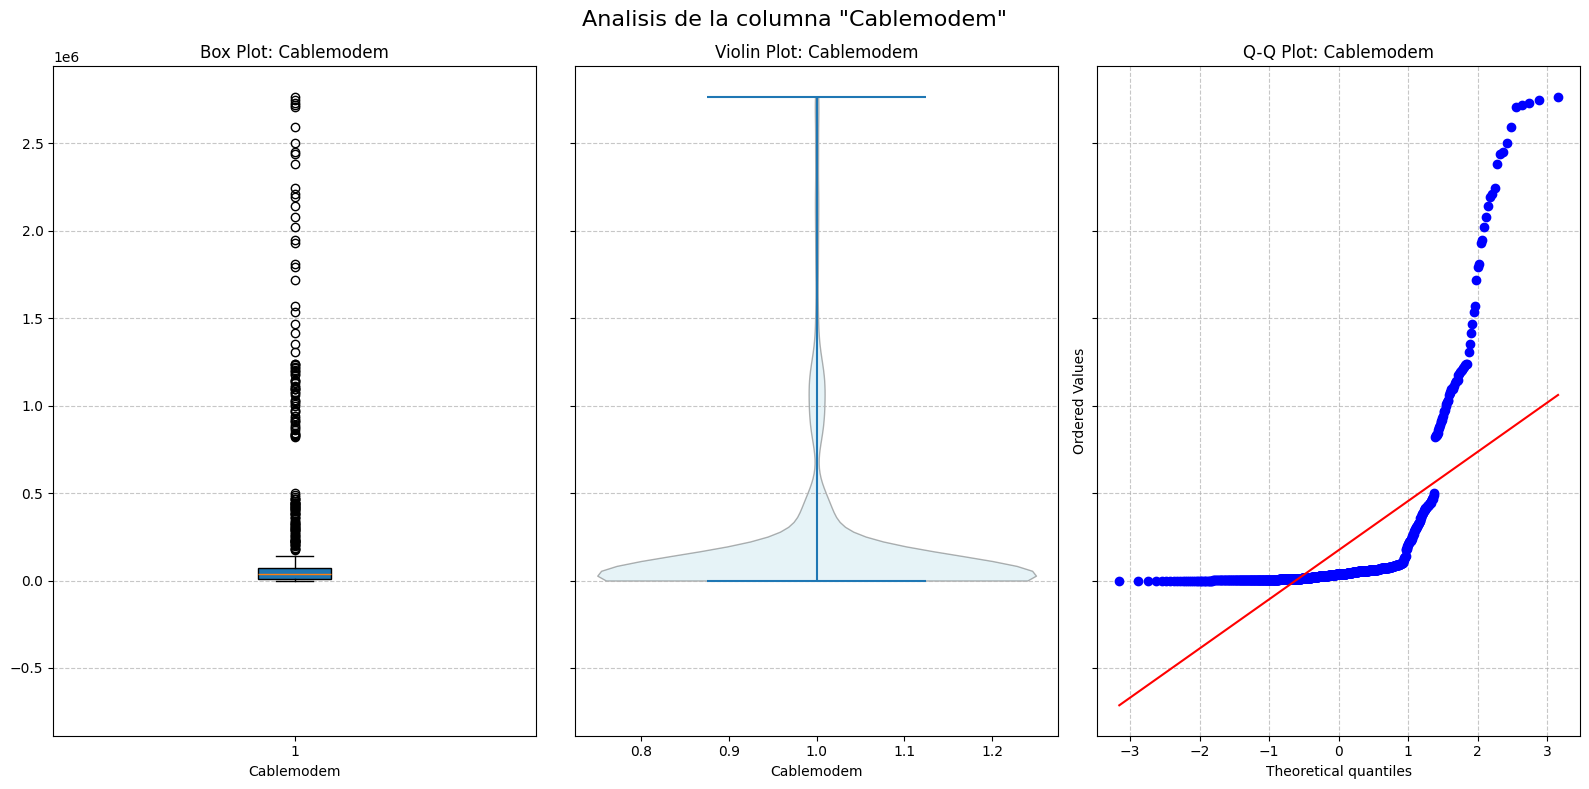

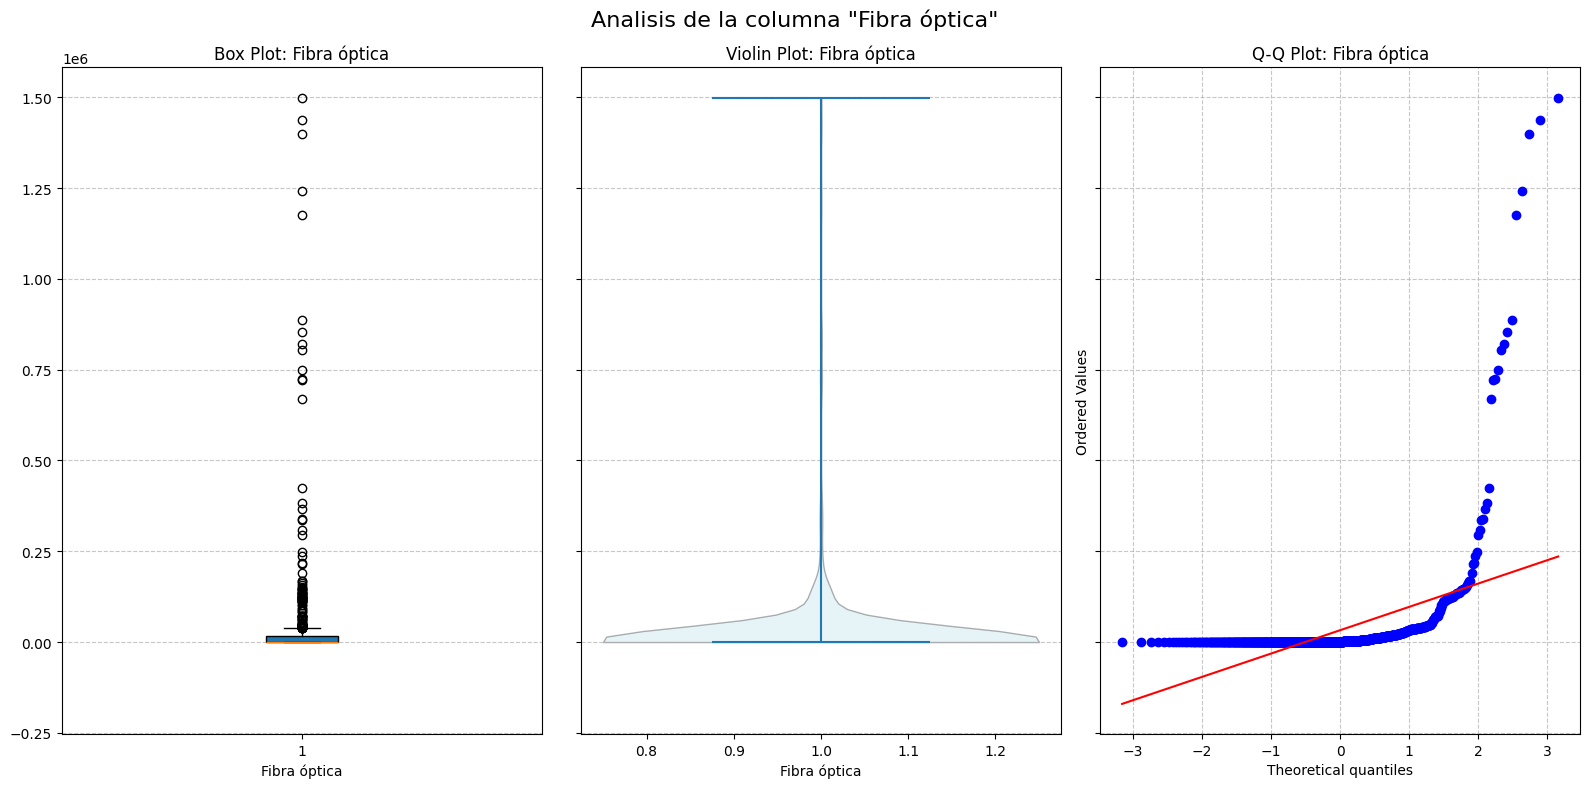

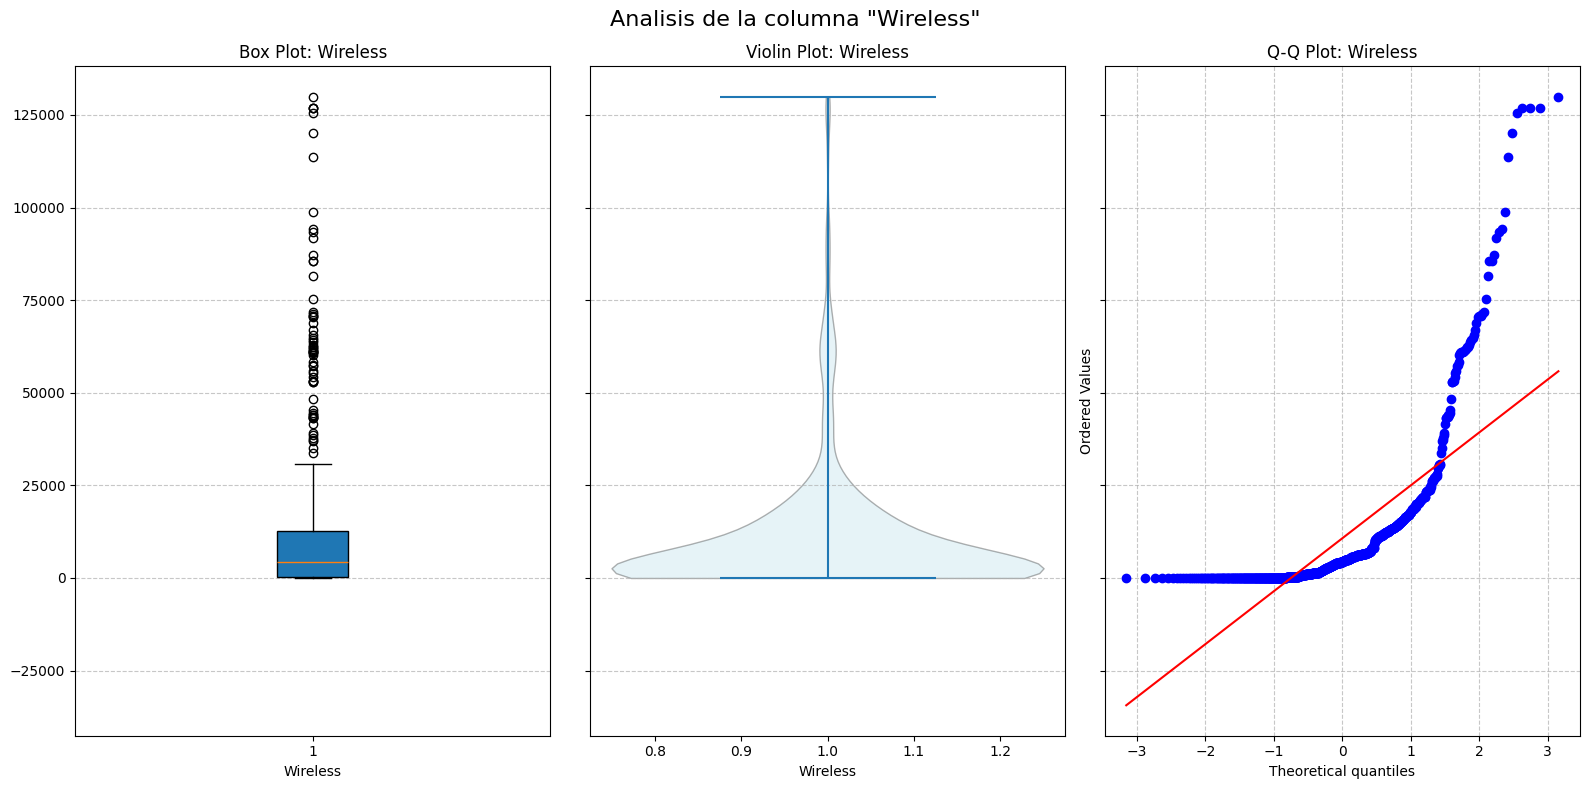

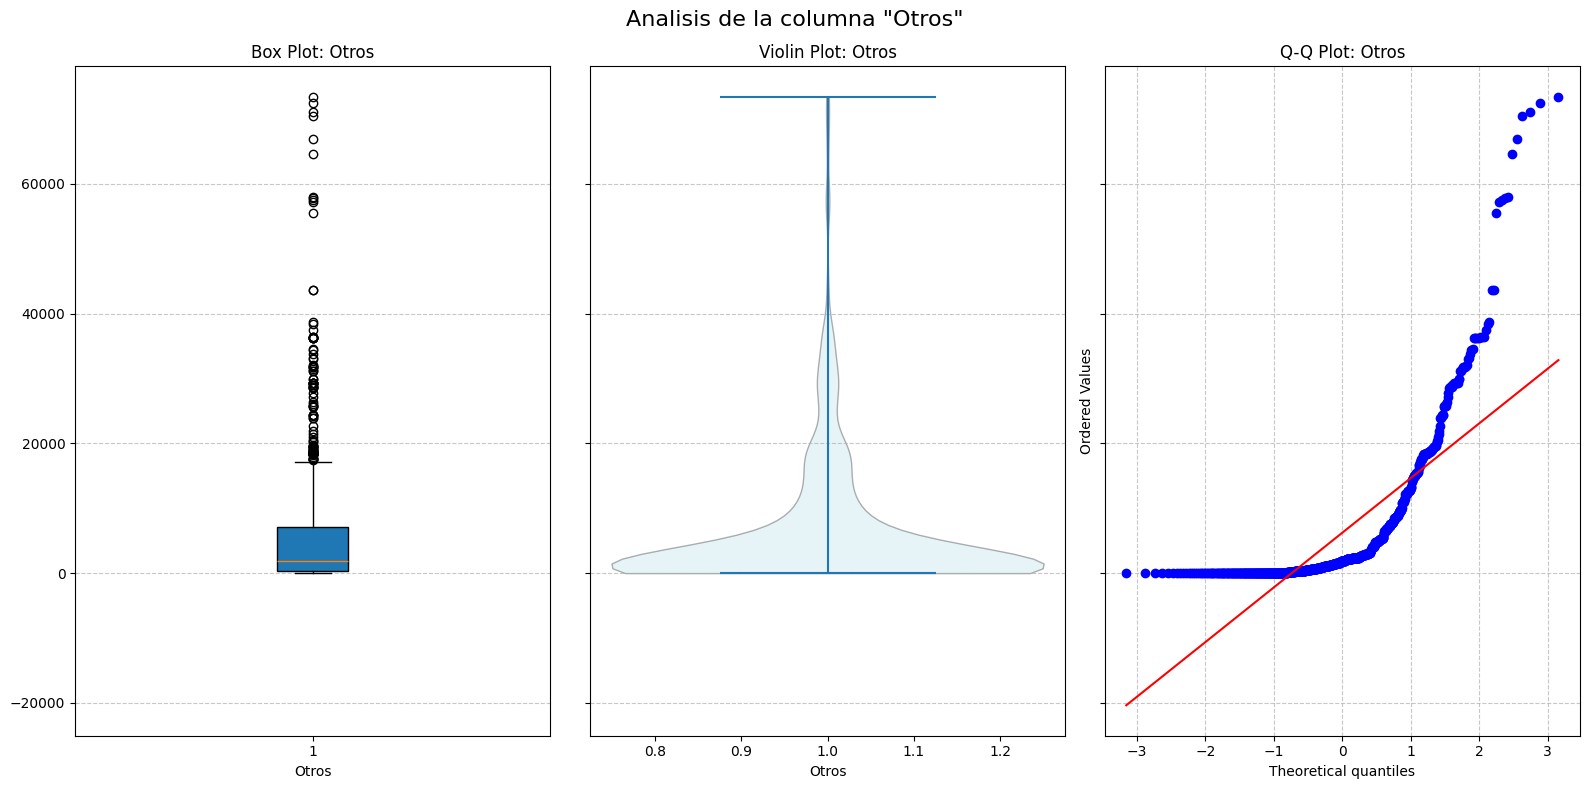

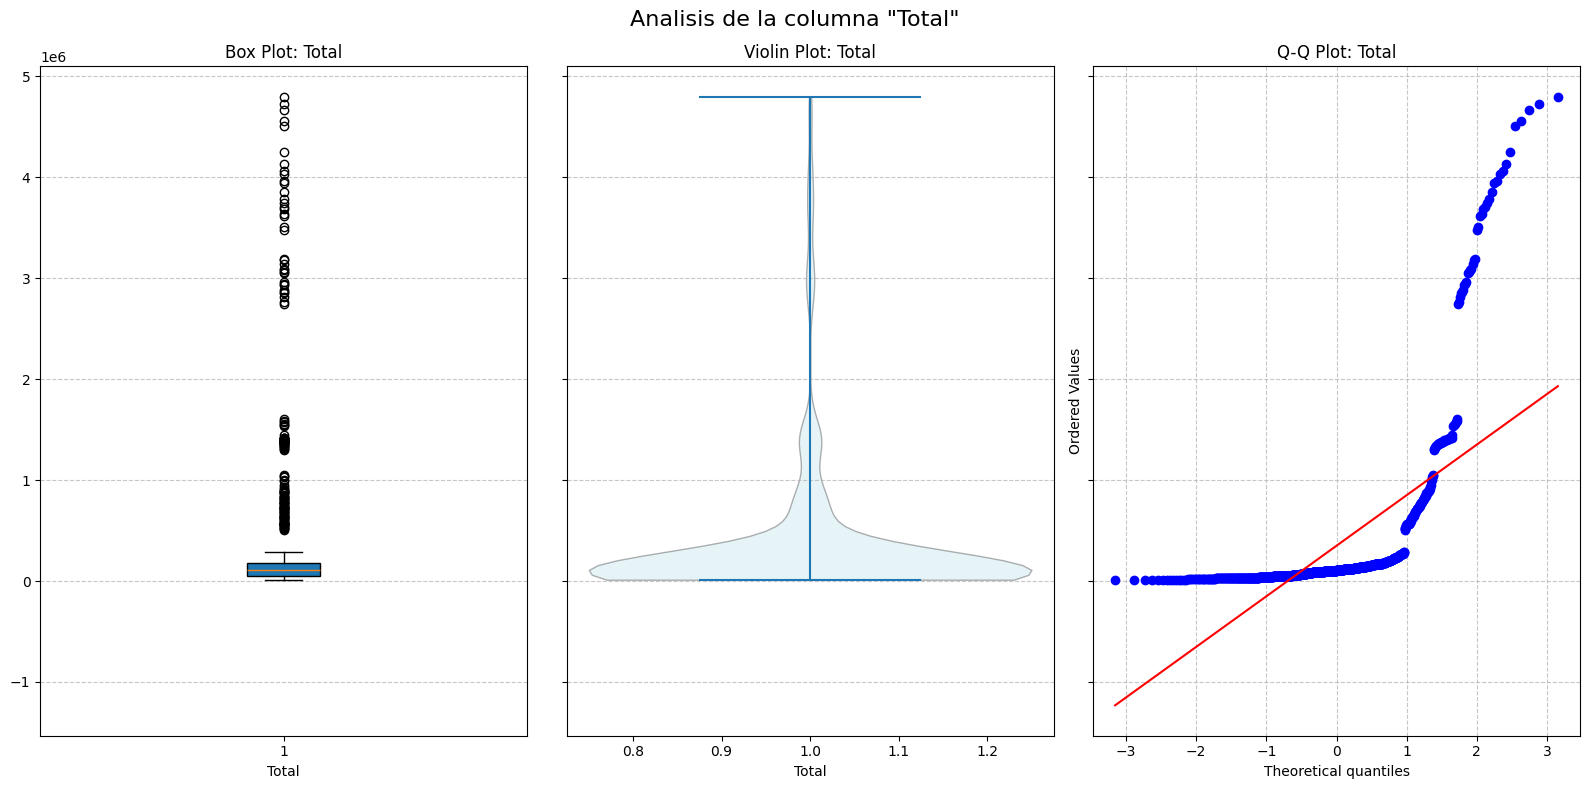

In [28]:
columnas_de_interes = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros', 'Total']
for columna in columnas_de_interes:
    univariable = analisis_univariable(df_05, columna)

### 2. Analisis del archivo 'Penetración del servicio de Internet fijo por provincia.csv'

In [4]:
df_06 = pd.read_csv('dataset_provincial/Penetración del servicio de Internet fijo por provincia.csv')
list(df_06.columns)

['Año',
 'Trimestre',
 'Provincia',
 'Accesos por cada 100 hogares',
 'Accesos por cada 100 hab']

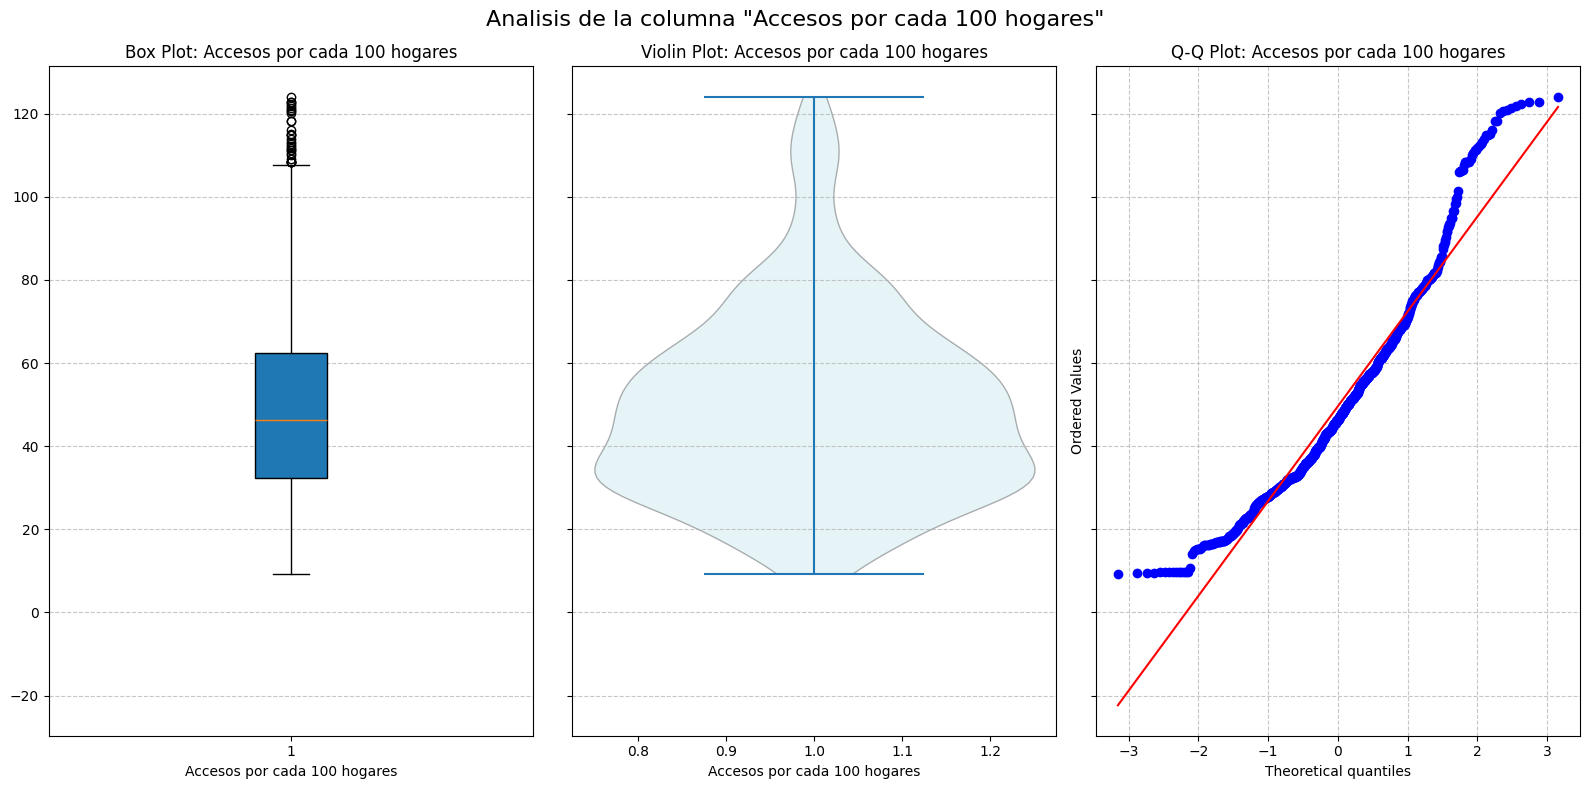

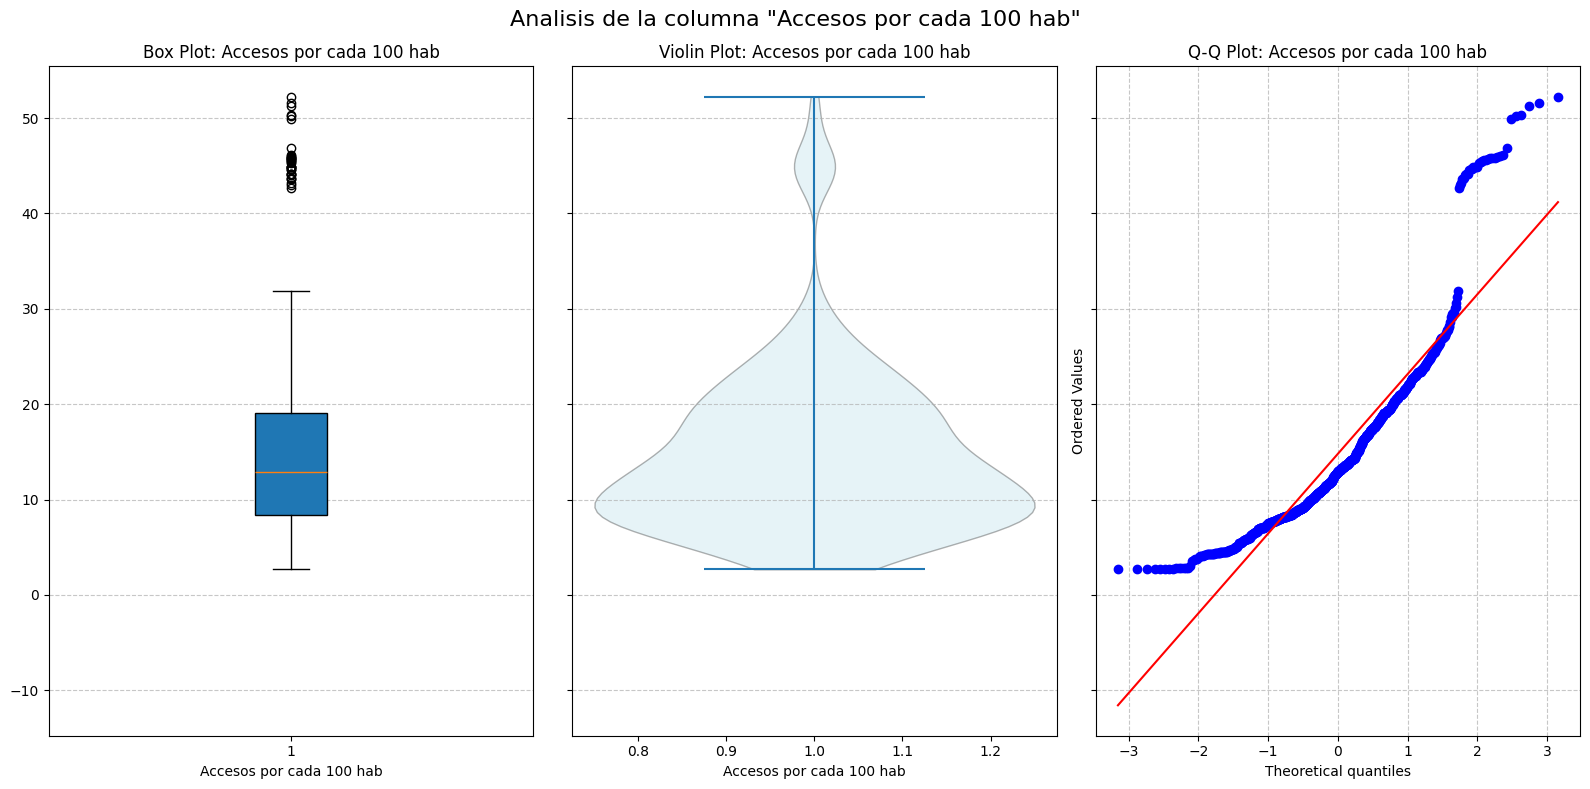

In [30]:
columnas_de_interes = ['Accesos por cada 100 hogares', 'Accesos por cada 100 hab']
for columna in columnas_de_interes:
    univariable = analisis_univariable(df_06, columna)

### 3. Analisis del archivo 'Velocidad Media de bajada de Internet por provincia.csv'

In [5]:
df_07 = pd.read_csv('dataset_provincial/Velocidad Media de bajada de Internet por provincia.csv')
list(df_07.columns)

['Año', 'Trimestre', 'Provincia', 'Mbps (Media de bajada)']

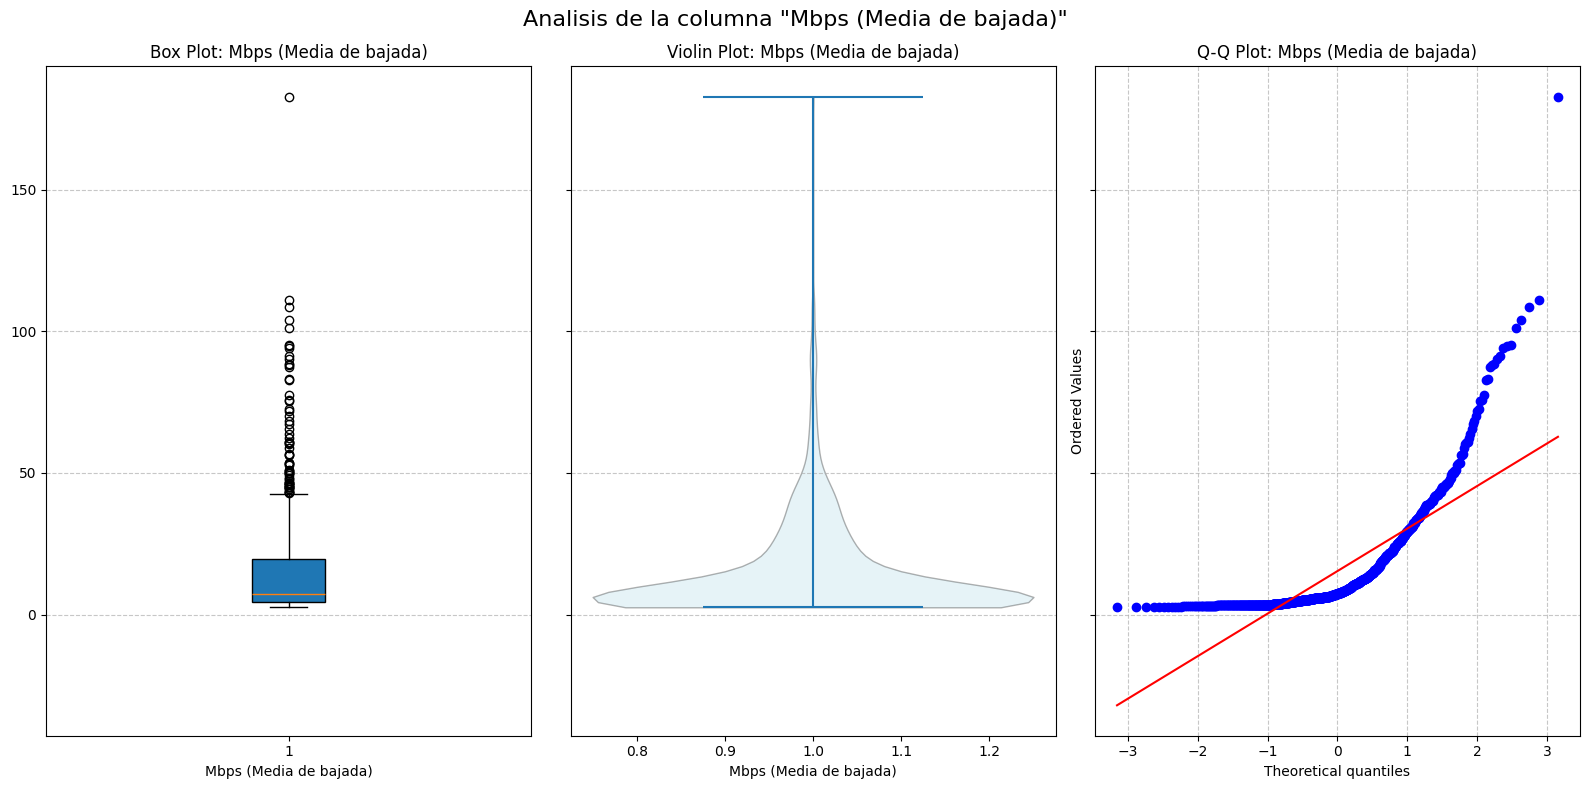

In [32]:
univariable = analisis_univariable(df_07, 'Mbps (Media de bajada)')

## - Salida final de archivos

In [6]:
# Unión de df_05 y df_07
merged_df2 = df_05.merge(df_07, on=['Año', 'Trimestre', 'Provincia'], how='inner')

# Unión de merged_df y df_06
merged_df2 = merged_df2.merge(df_06, on=['Año', 'Trimestre', 'Provincia'], how='inner')

merged_df2

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada),Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665,111.000000,78.940000,26.720000
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926,182.860000,122.730000,50.350000
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909,83.330000,65.770000,16.730000
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663,104.020000,43.620000,11.660000
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759,15.920000,85.570000,26.230000
...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927,100,381,4092,3264,26764,3.315991,28.939093,8.677327
860,2014,1,Santa Fe,322662,174296,3059,5951,644,506612,3.147407,47.847663,15.077801
861,2014,1,Santiago Del Estero,32567,3598,19,915,34,37133,2.949472,16.309924,4.058899
862,2014,1,Tierra Del Fuego,21618,2837,648,1,2934,28038,3.446888,63.965926,19.104921


In [35]:
# Guardar el DataFrame en un archivo CSV sin el índice
merged_df2.to_csv('dataset_final/archivo_final_provincial.csv', index=False)

Los archivos de nivel local no seran analizados debido a que no son reelevantes con el fin del encargo, su información es demasiado especifica.